<a href="https://colab.research.google.com/github/nishthadighe-bit/california-housing-prediction/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Prediction
This assignment explores housing prices using the built in California Housing Dataset from scikit-learn . We will apply regression techniques to model price relationships , visualize trends , and evaluate model performance.

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt  # This was the missing line!
import seaborn as sns

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column (convert to actual dollar value)
df['Price'] = data.target * 100000

# Preview the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [2]:
# Summary statistics
df.describe()
# Correlation matrix
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


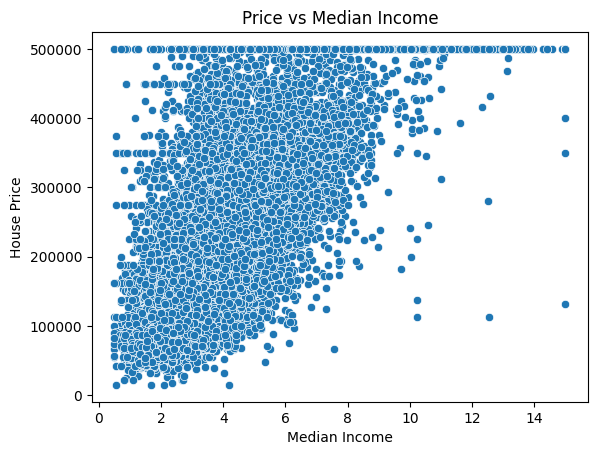

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot: Price vs Median Income
sns.scatterplot(x='MedInc', y='Price', data=df)
plt.title('Price vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Feature and target
X = df[['MedInc']]
y = df['Price']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

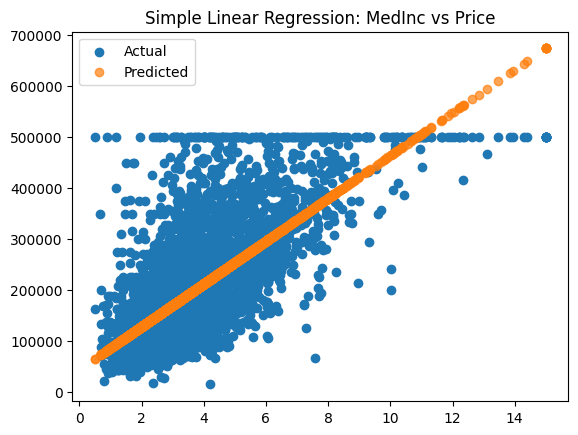

In [5]:
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Simple Linear Regression: MedInc vs Price')
plt.show()


In [6]:
# Select multiple features
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
X = df[features]
y = df['Price']
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Train model
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
# Predict
y_pred_multi = multi_model.predict(X_test)

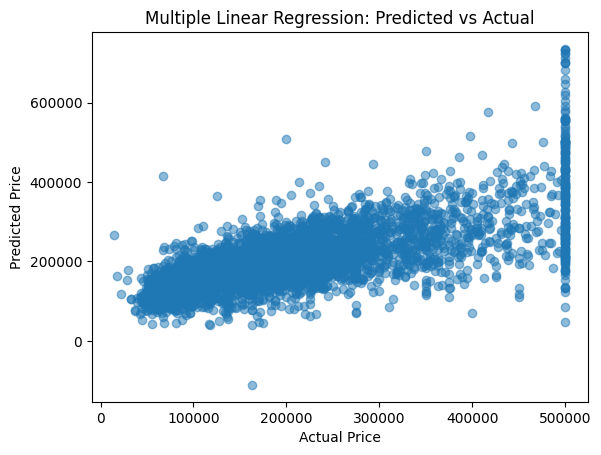

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression: Predicted vs Actual")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Use only "MedInc" for polynomial regression
X_poly = df[["MedInc"]]
y_poly = df["Price"]  # Use the correct target column

# Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Create pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)


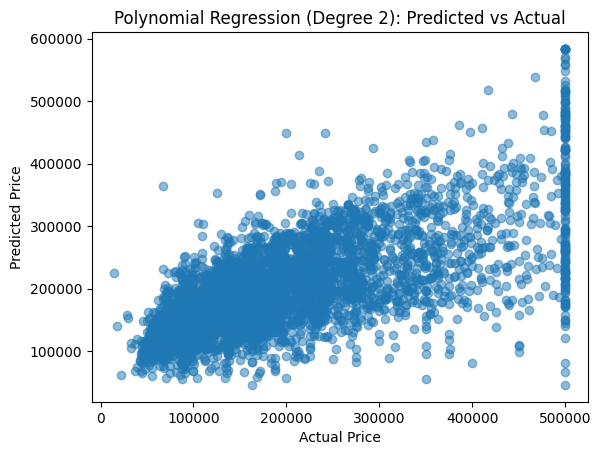

In [9]:
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression (Degree 2): Predicted vs Actual")
plt.show()

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Simple Linear Regression
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Multiple Linear Regression
r2_multi = r2_score(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

# Polynomial Regression
r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))

# Print summary
print("Model Evaluation Summary:")
print("Simple Linear Regression: R²={:.3f}, MAE={:.2f}, RMSE={:.2f}".format(r2, mae, rmse))
print("Multiple Linear Regression: R²={:.3f}, MAE={:.2f}, RMSE={:.2f}".format(r2_multi, mae_multi, rmse_multi))
print("Polynomial Regression: R²={:.3f}, MAE={:.2f}, RMSE={:.2f}".format(r2_poly, mae_poly, rmse_poly))



Model Evaluation Summary:
Simple Linear Regression: R²=0.459, MAE=62990.87, RMSE=84209.01
Multiple Linear Regression: R²=0.498, MAE=60254.80, RMSE=81083.40
Polynomial Regression: R²=0.463, MAE=62829.16, RMSE=83861.39


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Simple Linear Regression
r2_simple = r2_score(y_test, y_pred)
mae_simple = mean_absolute_error(y_test, y_pred)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred))

# Multiple Linear Regression
r2_multi = r2_score(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

# Polynomial Regression
r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))


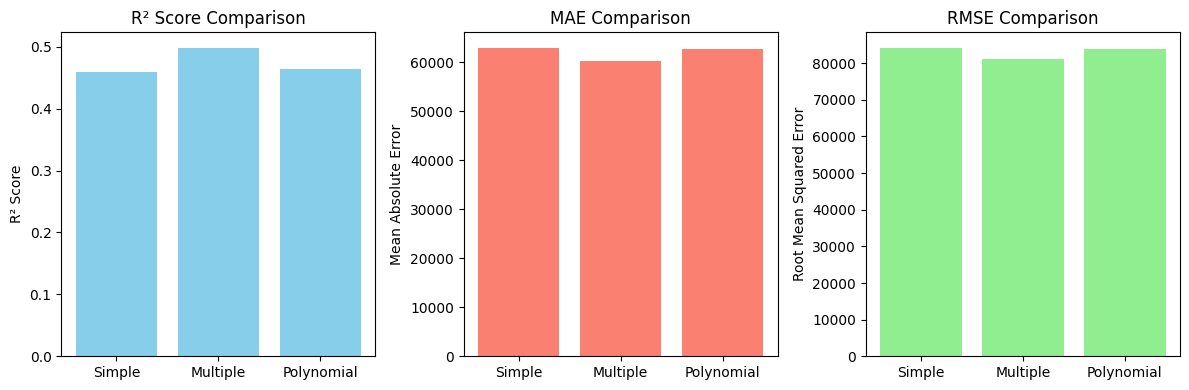

In [12]:
import matplotlib.pyplot as plt

# Model labels
models = ['Simple', 'Multiple', 'Polynomial']

# Metric values
r2_scores = [r2_simple, r2_multi, r2_poly]
mae_scores = [mae_simple, mae_multi, mae_poly]
rmse_scores = [rmse_simple, rmse_multi, rmse_poly]

# Create subplots
plt.figure(figsize=(12, 4))

# R² Score Comparison
plt.subplot(1, 3, 1)
plt.bar(models, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# MAE Comparison
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores, color='salmon')
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')

# RMSE Comparison
plt.subplot(1, 3, 3)
plt.bar(models, rmse_scores, color='lightgreen')
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')

# Layout adjustment
plt.tight_layout()
plt.show()

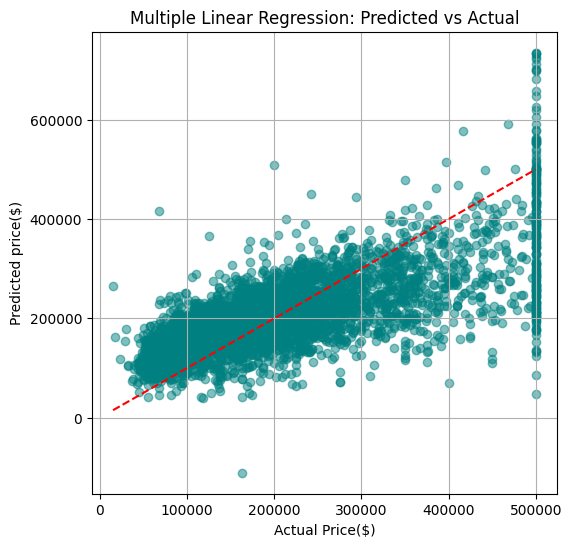

In [13]:
import matplotlib.pyplot as plt
# Plot for Multiple Linear Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted price($)")
plt.title("Multiple Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.show()

In [14]:
# Create new sample house data
new_house = pd.DataFrame({
    'MedInc': [6.5],      # Median income
    'AveRooms': [5.2],      # Average rooms
    'AveOccup': [3.0],      # Average occupancy
    'HouseAge': [25]       # Age of the house
})
# Use multiple regression model to predict
predicted_price = multi_model.predict(new_house)
print(f"Predicted House Price: ${predicted_price[0]:.2f}")

Predicted House Price: $318481.41


## ✅ Final Summary & Reflection

This assignment explored housing price prediction using regression models on the California Housing dataset. We:

- Explored feature relationships through scatter plots
- Built and compared simple, multiple, and polynomial regression models
- Evaluated performance using R², MAE, and RMSE
- Visualized predicted vs actual prices
- Predicted price for a new house using selected features

**Key Insight:**  
Multiple Linear Regression offered the best balance of accuracy and interpretability. Polynomial regression captured non-linear trends but showed signs of overfitting.

This workflow demonstrates how regression techniques can be applied to real-world data and highlights the importance of feature selection, model evaluation, and visualization.

## 📊 Model Evaluation Summary

| Model Type             | R² Score | MAE ($)   | RMSE ($)  |
|------------------------|----------|-----------|-----------|
| Simple Linear Regression | 0.459    | 62090.87  | 84209.01  |
| Multiple Linear Regression | 0.498    | 60254.80  | 81083.40  |
| Polynomial Regression     | 0.463    | 62136.16  | 83861.39  |